# Working With Dates Exercise

In [1]:
import pandas as pd

In [15]:
# Import the "kc_house_data.csv" and parse the "date" column in a single line
house = pd.read_csv("data/kc_house_data.csv", parse_dates= ["date"])
house.head(1)
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [6]:
# Calculate how many days the dataset spans
house.date.max() - house.date.min()

Timedelta('390 days 00:00:00')

In [8]:
#find the date that had the most house sales
house.date.value_counts().head(3)

date
2014-06-23    142
2014-06-26    131
2014-06-25    131
Name: count, dtype: int64

In [12]:
#find all the homes sold on that date
house.date.value_counts().head(1).index[0]

Timestamp('2014-06-23 00:00:00')

<Axes: ylabel='count'>

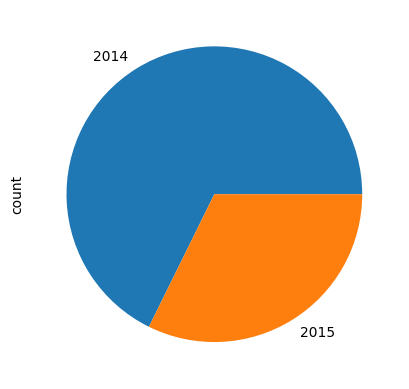

In [18]:
# Create a pie chart showing the years that home sales took place in (2014 and 2015)
house.date.dt.year.value_counts().plot(kind = "pie")

In [19]:
#Find all the homes sold in 2014, sorted from earliest to latest
house[house.date.dt.year == 2014].sort_values("date", ascending = True).head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11907,3221059036,2014-05-02,400000.0,4,2.5,3630,42884,1.5,0,0,...,9,2300,1330,1979,0,98092,47.2617,-122.190,2830,80148
20559,3438501320,2014-05-02,295000.0,2,2.5,1630,1368,2.0,0,0,...,7,1280,350,2009,0,98106,47.5489,-122.363,1590,2306
17038,2326059099,2014-05-02,838000.0,4,2.5,3310,42998,2.0,0,0,...,9,3310,0,2001,0,98052,47.7232,-122.131,3350,42847
15921,7831800460,2014-05-02,235000.0,2,1.0,1210,9400,1.0,0,0,...,6,1210,0,1949,0,98106,47.5342,-122.360,1580,6026
11891,7305300695,2014-05-02,625000.0,4,2.5,2820,8408,2.0,0,0,...,9,2820,0,2014,0,98155,47.7538,-122.325,1300,8408


In [20]:
#Count up the number of sales that took place in each month of the year.  Which month had the most?
house.date.dt.month.value_counts()

date
5     2414
4     2231
7     2211
6     2180
8     1940
10    1878
3     1875
9     1774
12    1471
11    1411
2     1250
1      978
Name: count, dtype: int64

<Axes: ylabel='count'>

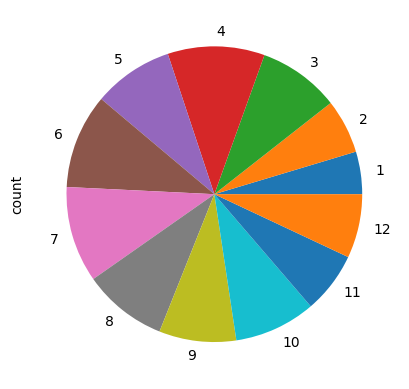

In [28]:
# Find the homes sold between May 1st 2014 and May 1st 2015
# Create a bar plot showing the total number of sales per month in that period
# The x axis should be in calendar order (1-12)

house[house.date.between("May 1st 2014", "May 1st 2015")]
house[house.date.between("May 1st 2014", "May 1st 2015")].date.dt.month.value_counts().sort_index(ascending = True).plot(kind = "pie")

In [29]:
# Count up the number of homesales by day of the week
house.date.dt.weekday.value_counts()

date
1    4715
2    4603
0    4099
3    3994
4    3685
5     287
6     230
Name: count, dtype: int64

<Axes: xlabel='week'>

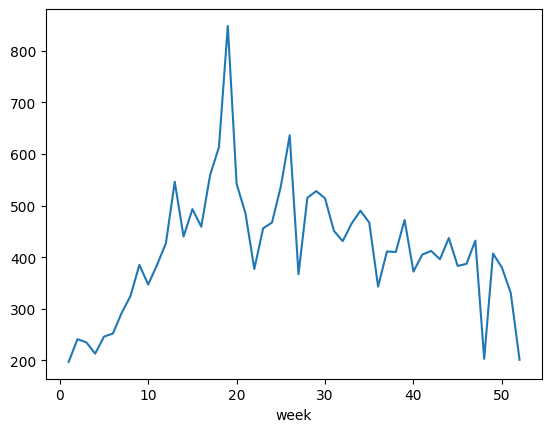

In [32]:
# Create a line plot showing the total number of sales by week of the year number (1-52)

house.date.dt.isocalendar().week.value_counts().sort_index().plot(kind = "line")

In [38]:
#Create a bar plot showing the total number of sales that took place in December, January, and February
house[house.date.dt.month.isin([12, 1, 2])].date.dt.month.value_counts()

date
12    1471
2     1250
1      978
Name: count, dtype: int64

/var/folders/zn/6npf5pd5277gbjjtr2b6gy400000gn/T/ipykernel_71973/1312729827.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  house[filter][waterfront].date.dt.quarter.value_counts().plot(kind = "bar")


<Axes: xlabel='date'>

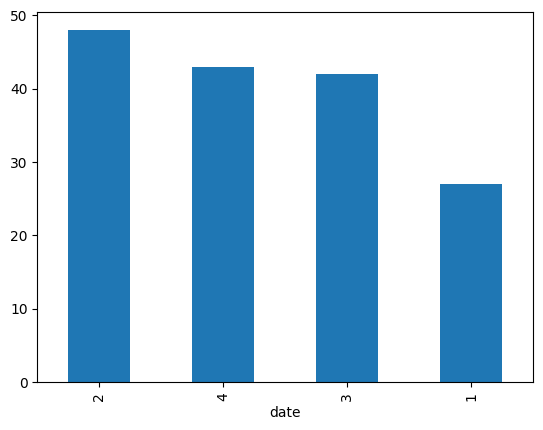

In [45]:
#Work with the homes sold between May 1st 2014 and May 1st 2015
#Within that year, find the waterfront homes that were sold
#Which quarter of that year had the most waterfront home sales?  The least?
#Create a bar plot showing the number of waterfront home sales per quarter
filter = house.date.between("May 1st 2014", "May 1st 2015")
waterfront = house["waterfront"] == 1
house[filter][waterfront].date.dt.quarter.value_counts().plot(kind = "bar")